# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Load data

In [2]:
df = pd.read_csv('data/imdb_sentiment.csv')
df.shape

(50000, 2)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Take a random subsample for training more efficiently
df = df.sample(5000, replace=False, random_state=42)

# Clean data

In [4]:
# Replace 'positive' and 'negative' for 1 and 0
df['sentiment'].replace({'negative': 0, 'positive': 1}, inplace=True)

In [5]:
import string
import re

In [6]:
# Removing the html tags
def clean_html(text):
    # Identify HTML tags
    clean = re.compile('<.*?>')
    # Replace HTML tags with an empty string
    cleantext = re.sub(clean, '', text)
    return cleantext
    
def clean_text(text):
    text = text.lower()
    # Remove text within square brackets
    text = re.sub('\[.*?\]', '', text)
    # Remove punctuation using a predefined set of punctuation characters
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    # Remove words containing numbers
    text = re.sub('\w*\d\w*','',text)
    # Remove quotation marks
    text = re.sub('[''"",,,]','',text)
    # Remove newline characters
    text = re.sub('\n','',text)
    
    return text

In [7]:
# Clean reviews' text

df['review'] = pd.DataFrame(df['review'].apply(clean_html))
df['review'] = pd.DataFrame(df['review'].apply(clean_text))

# EDA

In [8]:
df['sentiment'].value_counts()

1    2519
0    2481
Name: sentiment, dtype: int64

In [10]:
# Total number of words in corpus
all_words_list = ' '.join(list(df['review'].values)).split(' ')
pd.Series(all_words_list).nunique()

54476

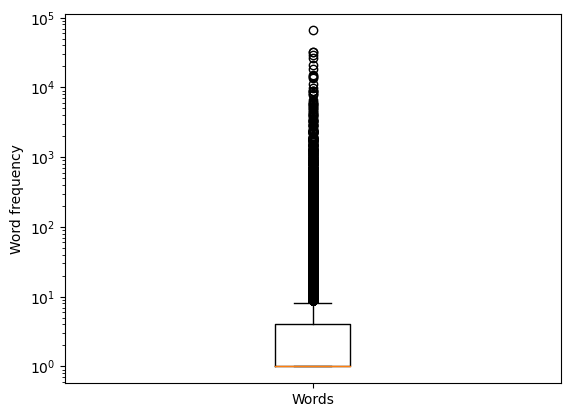

In [11]:
# Plot word frequencies

plt.boxplot(pd.Series(all_words_list).value_counts().values)
plt.ylabel('Word frequency')
plt.xticks([1], ['Words'])
plt.yscale('log')
plt.show()

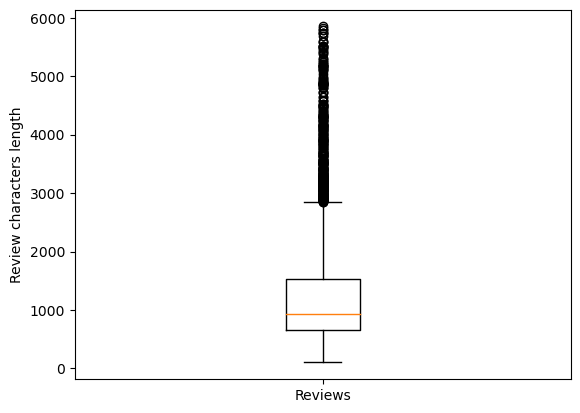

In [12]:
# Plot review lengths in characters

plt.boxplot(df['review'].replace(' ', '').str.len())
plt.ylabel('Review characters length')
plt.xticks([1], ['Reviews'])
plt.show()

# Pre-trained Transformers

In [10]:
from transformers import pipeline

In [11]:
X = df['review']
y = df['sentiment']
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)

## DistilBERT (default)

In [30]:
model = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [67]:
preds = model(X_test_raw.values.tolist(), truncation=True)

In [68]:
y_pred = pd.DataFrame(preds)['label'].replace({'NEGATIVE': 0, 'POSITIVE': 1}).values
print('Test Accuracy:', accuracy_score(y_test_raw, y_pred))

Test Accuracy: 0.875


## Sentiment Roberta

In [12]:
model = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [13]:
preds = model(X_test_raw.values.tolist(), truncation=True)

In [15]:
y_pred = pd.DataFrame(preds)['label'].replace({'NEGATIVE': 0, 'POSITIVE': 1}).values
print('Test Accuracy:', accuracy_score(y_test_raw, y_pred))

Test Accuracy: 0.952
